In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
# create a dataframe

students = pd.read_csv("StudentPerformanceFactors_Cleaned.csv")


In [29]:
#transformation of every new qualitative columns : 
value_mapping_parent = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'very high': 4
}
students['Parental_Involvement'] = students['Parental_Involvement'].replace(value_mapping_parent)
students['Parental_Involvement'] = students['Parental_Involvement'].astype('Int64')

#rtansform Access_to_Resources
students['Access_to_Resources'] = students['Access_to_Resources'].replace(value_mapping_parent)
students['Access_to_Resources'] = students['Access_to_Resources'].astype('Int64')

#transform Extracurricular_Activities
value_activities = {
    'Yes':1,
    'No':0
}

students["Extracurricular_Activities"] = students["Extracurricular_Activities"].replace(value_activities)
students["Extracurricular_Activities"] = students["Extracurricular_Activities"].astype('Int64')

#transform Internet Access
students["Internet_Access"] = students["Internet_Access"].replace(value_activities)
students["Internet_Access"] = students["Internet_Access"].astype('Int64')


#transform Motivation_Level
students['Motivation_Level'] = students['Motivation_Level'].replace(value_mapping_parent)
students['Motivation_Level'] = students['Motivation_Level'].astype('Int64')

#transform Family_Income
students['Family_Income'] = students['Family_Income'].replace(value_mapping_parent)
students['Family_Income'] = students['Family_Income'].astype('Int64')


#transform Teacher_Quality
students['Teacher_Quality'] = students['Teacher_Quality'].replace(value_mapping_parent)
students['Teacher_Quality'] = students['Teacher_Quality'].astype('Int64')

# transform School_type : 
value_school = {
    'Public': 1,
    'Private': 0
}

students['School_Type'] = students['School_Type'].replace(value_school)
students['School_Type'] = students['School_Type'].astype('Int64')

# transform Peer_Influence

value_peer = {
    'Positive':2,
    'Negative':0,
    'Neutral':1
}
students['Peer_Influence'] = students['Peer_Influence'].replace(value_peer)
students['Peer_Influence'] = students['Peer_Influence'].astype('Int64')


#transform Learning_Disabilities
students["Learning_Disabilities"] = students["Learning_Disabilities"].replace(value_activities)
students["Learning_Disabilities"] = students["Learning_Disabilities"].astype('Int64')

#transform : Parental_Education_Level
value_education = {
    "College":0,
    "High School":1,
    "Postgraduate": 2
}
students["Parental_Education_Level"] = students["Parental_Education_Level"].replace(value_education)
students["Parental_Education_Level"] = students["Parental_Education_Level"].astype('Int64')

# transform : Distance_from_Home

value_distance = {
    "Near":0,
    "Moderate":1,
    "Far":2
}
students["Distance_from_Home"] = students["Distance_from_Home"].replace(value_distance)
students["Distance_from_Home"] = students["Distance_from_Home"].astype('Int64')


# transform Gender
value_gender = {
    'Male': 0,
    'Female': 1
    }
students['Gender'] = students['Gender'].replace(value_gender)
students['Gender'] =  students['Gender'].astype('Int64')


C:\Users\robin\AppData\Local\Temp\ipykernel_20540\4232002483.py:82: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  students["Distance_from_Home"] = students["Distance_from_Home"].replace(value_distance)
C:\Users\robin\AppData\Local\Temp\ipykernel_20540\4232002483.py:91: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  students['Gender'] = students['Gender'].replace(value_gender)


In [30]:

students.select_dtypes(include=['float64', 'int64']).columns

Index(['Unnamed: 0', 'Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

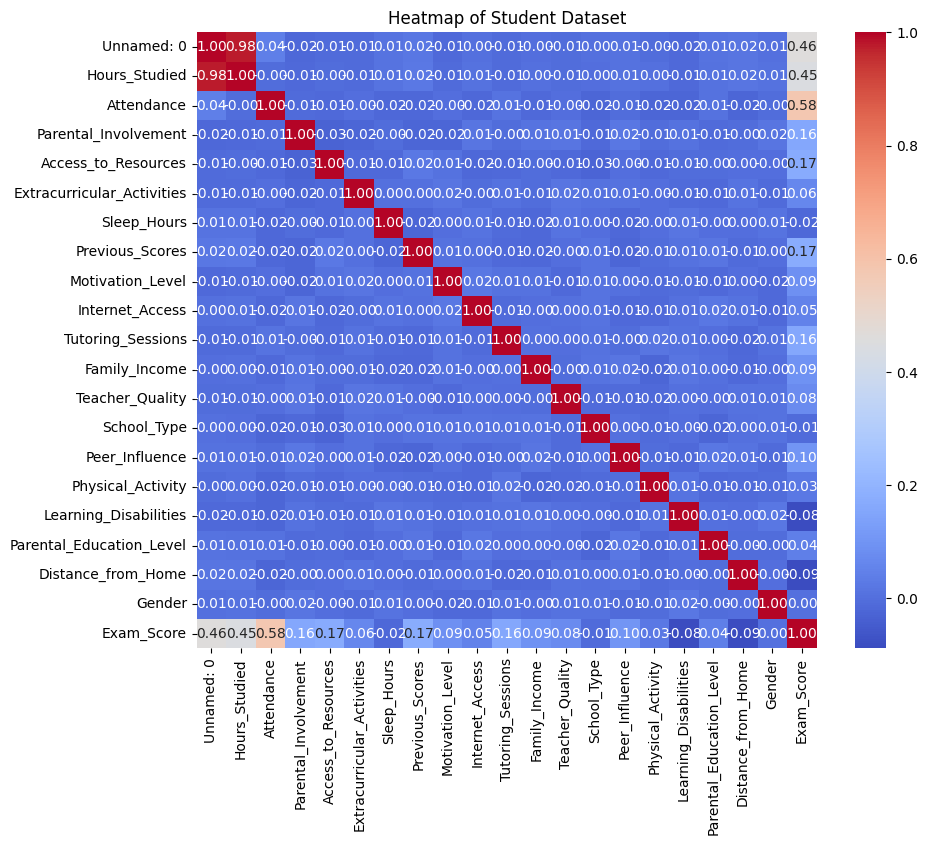

In [31]:
numeric_df = students.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Student Dataset')
plt.show()

On peut voir que les différentes colonnes les plus en corrélations sont les exam scores avec attendance  et les exam scores avec study hours

Après qu'on ait tout transformer on peut remarquer que les exams scores sont les plus liés aux heures étudiées, la présence, l'investissement des parents mais aussi à l'accès aux ressources et aux dernières notes


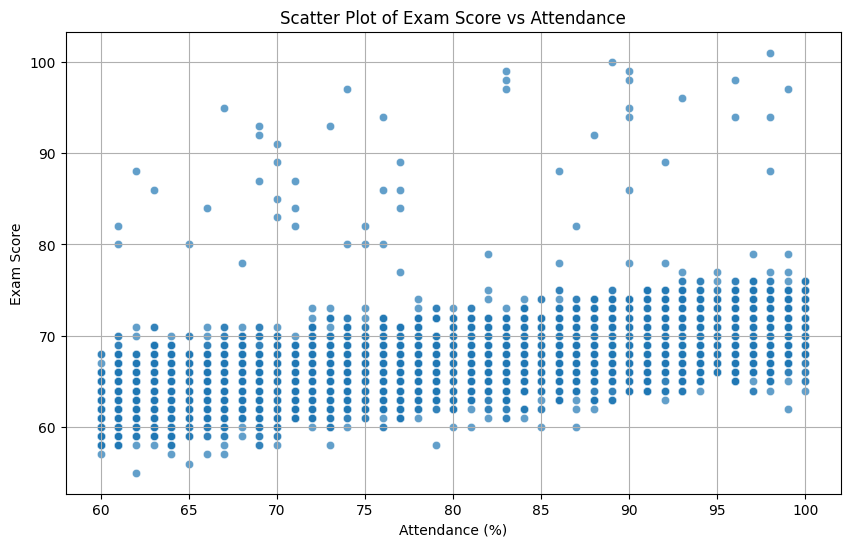

In [4]:
# Assuming 'exam_score' and 'attendance' are the column names in your dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(data=students, x='Attendance', y='Exam_Score', alpha=0.7)
plt.title('Scatter Plot of Exam Score vs Attendance')
plt.xlabel('Attendance (%)')  # Adjust the label according to your data
plt.ylabel('Exam Score')       # Adjust the label according to your data
plt.grid(True)
plt.show()

In [ ]:
numeric_cols = students.select_dtypes(include=['float64', 'int64']).columns
# Créer un objet MinMaxScaler
min_max_scaler = MinMaxScaler()

# Appliquer la normalisation
students[numeric_cols] = min_max_scaler.fit_transform(students[numeric_cols])



,Unnamed: 0,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,0.000000,0.000000,0.225,0.333333,0.94,0.125,0.500000,0.130435
1,0.000151,0.000000,0.525,0.666667,0.32,0.125,0.333333,0.108696
2,0.000302,0.000000,0.700,0.000000,0.44,0.375,0.333333,0.804348
3,0.000454,0.023256,0.175,0.333333,0.46,0.125,0.333333,0.065217
4,0.000907,0.023256,0.950,0.000000,0.28,0.125,0.333333,0.217391
...,...,...,...,...,...,...,...,...
6373,0.999395,0.883721,0.800,0.833333,0.46,0.125,0.666667,0.434783
6374,0.999546,0.883721,0.875,0.833333,0.08,0.250,0.500000,0.478261
6375,0.999698,0.883721,0.925,1.000000,0.82,0.250,0.500000,0.521739
6376,0.999849,0.976744,0.650,0.500000,0.94,0.250,0.166667,0.500000


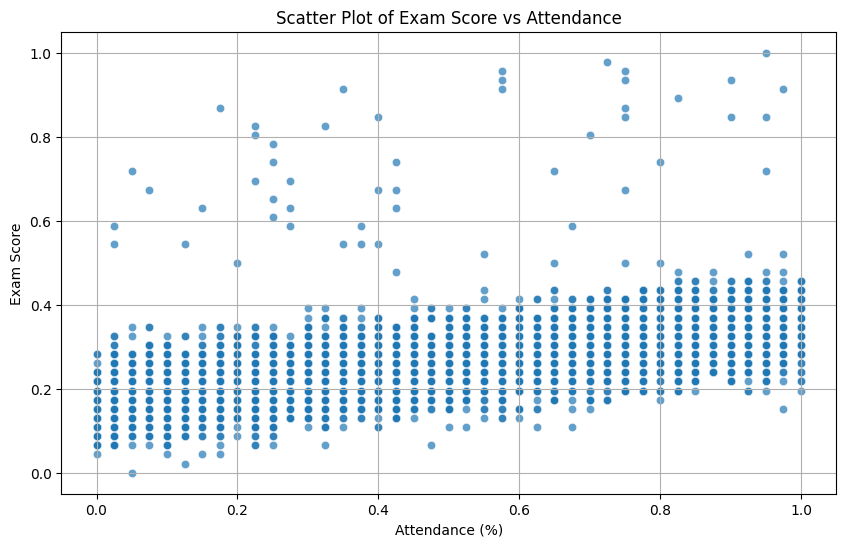

In [7]:
# Assuming 'exam_score' and 'attendance' are the column names in your dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(data=students, x='Attendance', y='Exam_Score', alpha=0.7)
plt.title('Scatter Plot of Exam Score vs Attendance')
plt.xlabel('Attendance (%)')  # Adjust the label according to your data
plt.ylabel('Exam Score')       # Adjust the label according to your data
plt.grid(True)
plt.show()

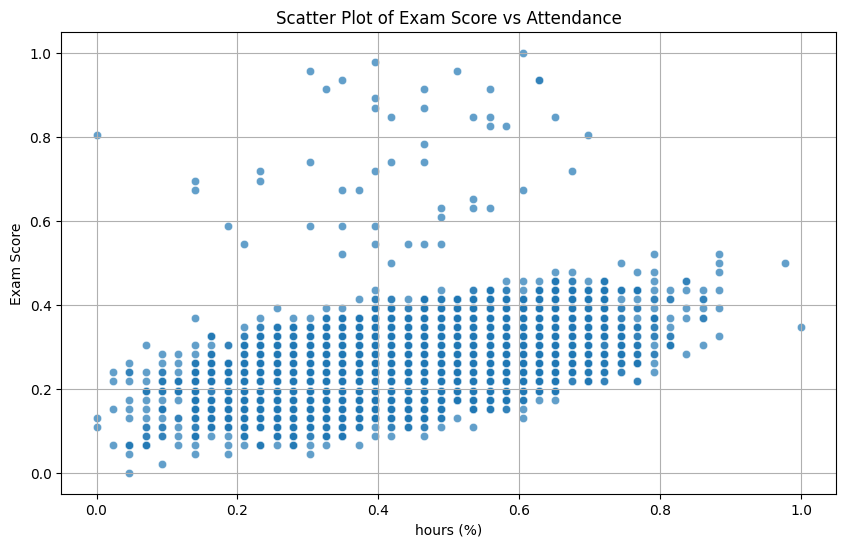

In [8]:
# Assuming 'exam_score' and 'hours studied' are the column names in your dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(data=students, x='Hours_Studied', y='Exam_Score', alpha=0.7)
plt.title('Scatter Plot of Exam Score vs Attendance')
plt.xlabel('hours (%)')  # Adjust the label according to your data
plt.ylabel('Exam Score')       # Adjust the label according to your data
plt.grid(True)
plt.show()